<a href="https://colab.research.google.com/github/tuntunwinkic/mliot/blob/master/LaeLae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import*

In [0]:
import os

In [0]:
os.chdir('/content/gdrive/My Drive/LLW/Banknotes')

In [0]:
path = Path('/content/gdrive/My Drive/LLW/Banknotes')

In [6]:
path.ls()

[PosixPath('/content/gdrive/My Drive/LLW/Banknotes/200'),
 PosixPath('/content/gdrive/My Drive/LLW/Banknotes/1000'),
 PosixPath('/content/gdrive/My Drive/LLW/Banknotes/5000'),
 PosixPath('/content/gdrive/My Drive/LLW/Banknotes/500'),
 PosixPath('/content/gdrive/My Drive/LLW/Banknotes/100'),
 PosixPath('/content/gdrive/My Drive/LLW/Banknotes/10000'),
 PosixPath('/content/gdrive/My Drive/LLW/Banknotes/1000new')]

In [0]:
classes = ['5000','500','1000','10000','200','1000new','100']

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


5000


500


1000


10000


200


1000new


100


In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
         size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['100', '1000', '10000', '1000new', '200', '500', '5000'], 7, 168, 42)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


In [27]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.000930,0.433371,0.126984,00:03
1,0.000865,0.304568,0.142857,00:03
2,0.000657,0.185976,0.126984,00:03
3,0.000774,0.111369,0.047619,00:03
4,0.000983,0.083531,0.047619,00:03
5,0.000857,0.066859,0.031746,00:03
6,0.001620,0.059855,0.031746,00:03


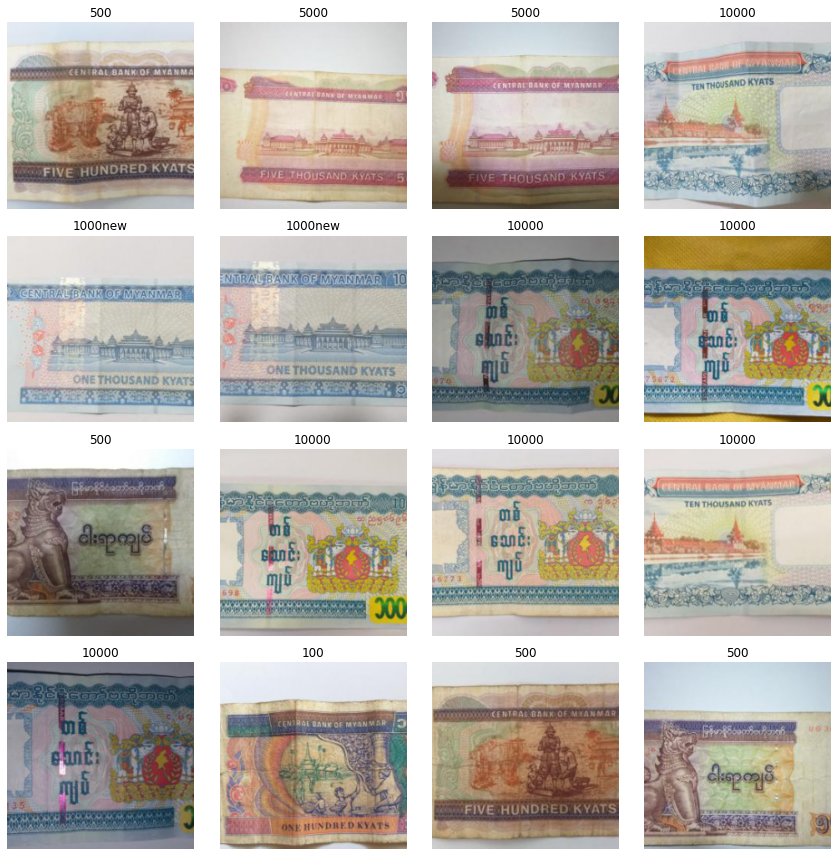

In [15]:
data.show_batch(rows=4, figsize=(12,12))


In [28]:
interp = ClassificationInterpretation.from_learner(learn)


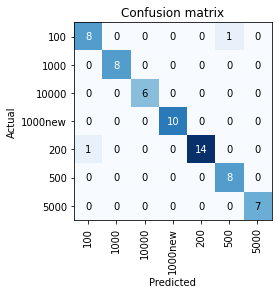

In [29]:
interp.plot_confusion_matrix()


In [0]:
img = open_image('/content/gdrive/My Drive/LLW/Banknotes/1000new/20200309_192552.jpg')


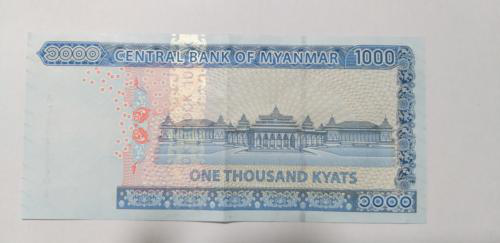

In [31]:
img

In [32]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 1000new

In [33]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
___________________________________________________